<a href="https://colab.research.google.com/github/valerian720/gradient_algorythms_visualized/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Требования к функциональности компьютерной программы

В программе должны задаваться следующие настройки:
  - целевая функция,
  - значения параметров рассматриваемых алгоритмов (отдельно для каждого алгоритма),
  -начальное приближение,
  -максимальное количество шагов алгоритма.
  -При каждом запуске программы должен строиться график, показывающий траекторию движения каждого из алгоритмов по ландшафту целевой функции, 
  -а также график, отображающий зависимость значения целевой функции от номера шага алгоритма.

In [ ]:
import math
import numpy as np
import matplotlib.ticker as tic
from matplotlib import pyplot as plt

In [ ]:
# 1. Функция Химмельблау
def himmelblau(x, y):
    return ((x**2 + y - 11)**2) + ((x + y**2 - 7)**2) 
 
def himmelblau_grad(x, y, grad_x): 
    if grad_x == True: 
        # Частная производная по х
        out = 4*x*(x**2 + y - 11) + (2*x + 2*y**2 - 14)
    else:     
        # Частная производная y          
        out = 2*x**2 + 4*y*(x + y**2 - 7) + 2*y - 22
    return out
 
 
# 2. Styblinski-Tank Function
def styblinski_tank(x, y):
    out = (x**4 - 16*x**2 + 5*x) + (y**4 - 16*y**2 + 5*y)
    return 0.5 * out
 
def ST_grad(x, y, grad_x):
    if grad_x == True: 
        return 2*x**3 - 16*x + 2.5
    else:             
        return 2*y**3 - 16*y + 2.5
    
 
# 3. Функция Розенброка
def rosenbrock(x, y): 
    return (1 - x)**2 + 100*(y - x**2)**2 
 
def rosenbrock_grad(x, y, grad_x):
    if grad_x == True: 
        return -400*x*(-x**2 + y) + 2*x - 2
    else:           
        return -200*x**2 + 200*y
 
 
# 4. Функция Гольдман-Прайса
def GdPr_function(x, y): 
    p1 = 1 + ((x + y + 1)**2) * (19 - 14*x + 3*x**2 - 14*y + 6*x*y + 3*y**2)
    p2 = 30 + ((2*x - 3*y)**2) * (18 - 32*x + 12*x**2 + 48*y - 36*x*y + 27*y**2)
    return p1 * p2
 
 
def GdPr_grad(x, y, grad_x):
    if grad_x == True: 
        return ((3*x**2 + 6*x*y - 14*x + 3*y**2 - 14*y + 19)*(x + y + 1)**2 + 1)*(4*(12*x**2 - 36*x*y - 32*x + 27*y**2 + 48*y + 18)*(2*x - 3*y) + (24*x - 36*y - 32)*(2*x - 3*y)**2) + (2*(3*x**2 + 6*x*y - 14*x + 3*y**2 - 14*y + 19)*(x + y + 1) + (6*x + 6*y - 14)*(x + y + 1)**2)*((12*x**2 - 36*x*y - 32*x + 27*y**2 + 48*y + 18)*(2*x - 3*y)**2 + 30)
    else:           
        return ((3*x**2 + 6*x*y - 14*x + 3*y**2 - 14*y + 19)*(x + y + 1)**2 + 1)*((2*x - 3*y)**2 * (-36*x + 54*y + 48) - 6*(2*x - 3*y) * (12*x**2 - 36*x*y - 32*x + 27*y**2 + 48*y + 18)) + (2*(3*x**2 + 6*x*y - 14*x + 3*y**2 - 14*y + 19)*(x + y + 1) + (6*x + 6*y - 14)*(x + y + 1)**2)*((12*x**2 - 36*x*y - 32*x + 27*y**2 + 48*y + 18)*(2*x - 3*y)**2 + 30)

In [ ]:
def visualization(x1, x2, y, X1_list, X2_list):
    fig,ax=plt.subplots(1,1)
    cp = ax.contourf(x1, x2, y, 15)
 
    fig.colorbar(cp) 
    fig.set_figwidth(12)
    fig.set_figheight(9)
 
    ax.set_xlabel("x1", fontsize="12")
    ax.set_ylabel("x2", fontsize="12")
    ax.grid()
 
    labels = ['GD', 'MGD', 'RMSProp', 'Adam']
    colors = ['r', 'lime', 'cornflowerblue', 'orange']
 
    for item1, item2, color, l in zip(X1_list, X2_list, colors, labels):
        ax.plot(item1, item2, linewidth="3", color=color, label=l)
 
    ax.scatter(X1_list[0][0], X2_list[0][0], linewidth="5", color='r')
    ax.legend()
    plt.show()

In [ ]:
def gradient_clipping(grad_x, grad_y, norma):
    return (norma / math.sqrt(grad_x**2 + grad_y**2)) * norma
 
def SGD(x1, x2, norma = 1.1, lim = 0.001):
    x1_list = []
    x2_list = []
    
    x1_list.append(x1)
    x2_list.append(x2)
 
 
    for i in range(era_count): 
        stepX = rate * func_grad(x1, x2, True)
        stepY = rate * func_grad(x1, x2, False)
 
        if stepX >= norma: stepX = gradient_clipping(stepX, stepY, lim)
        if stepX <= -norma: stepX = -gradient_clipping(stepX, stepY, lim)
 
        if stepY >= norma: stepY = gradient_clipping(stepX, stepY, lim)
        if stepY <= -norma: stepY = -gradient_clipping(stepX, stepY, lim)
 
        x1 -= stepX
        x2 -= stepY
 
        x1_list.append(round(x1, 4))
        x2_list.append(round(x2, 4))
 
    return np.array(x1_list), np.array(x2_list)

In [ ]:
def impulse_SGD(x1, x2, beta, norma = 1, lim = 0.001):
    V_x1 = 0
    V_x2 = 0
 
    x1_list = []
    x2_list = []
    
    x1_list.append(x1)
    x2_list.append(x2)
 
    for i in range(era_count): 
        V_x1 = beta * V_x1 + (1 - beta) * func_grad(x1, x2, True)
        V_x2 = beta * V_x2 + (1 - beta) * func_grad(x1, x2, False)
 
        stepX = rate * V_x1
        stepY = rate * V_x2
 
        if stepX >= norma: stepX = gradient_clipping(stepX, stepY, lim)
        if stepX <= -norma: stepX = -gradient_clipping(stepX, stepY, lim)
 
        if stepY >= norma: stepY = gradient_clipping(stepX, stepY, lim)
        if stepY <= -norma: stepY = -gradient_clipping(stepX, stepY, lim)
        
        x1 -= stepX
        x2 -= stepY
 
        x1_list.append(round(x1, 4))
        x2_list.append(round(x2, 4))
 
    return np.array(x1_list), np.array(x2_list)

In [ ]:
def RMSProp(x1, x2, beta):
    S_x1 = 0
    S_x2 = 0
 
    x1_list = []
    x2_list = []
 
    x1_list.append(x1)
    x2_list.append(x2)
 
    for i in range(era_count): 
        S_x1 = beta * S_x1 + ((1 - beta) * (func_grad(x1, x2, True))**2)
        S_x2 = beta * S_x2 + ((1 - beta) * (func_grad(x1, x2, False))**2)
 
        step_x1 = rate * (func_grad(x1, x2, True) / (math.sqrt(S_x1) + 0.0001))
        step_x2 = rate * (func_grad(x1, x2, False) / (math.sqrt(S_x2) + 0.0001))
 
        x1 -= step_x1
        x2 -= step_x2
 
        x1_list.append(x1)
        x2_list.append(x2)
 
    return np.array(x1_list), np.array(x2_list)

In [ ]:
def Adam(x1, x2, beta1, beta2):
    S_x1 = 0
    S_x2 = 0
 
    V_x1 = 0
    V_x2 = 0
 
    x1_list = []
    x2_list = []
 
    x1_list.append(x1)
    x2_list.append(x2)
 
    for i in range(era_count): 
        V_x1 = beta1 * V_x1 + (1 - beta1) * func_grad(x1, x2, True)
        V_x2 = beta1 * V_x2 + (1 - beta1) * func_grad(x1, x2, False)
 
        S_x1 = beta2 * S_x1 + (1 - beta2) * (func_grad(x1, x2, True))**2
        S_x2 = beta2 * S_x2 + (1 - beta2) * (func_grad(x1, x2, False))**2
 
        V_x1_corr = V_x1 / (1 - beta1 ** (i+1))
        V_x2_corr = V_x2 / (1 - beta1 ** (i+1))
 
        S_x1_corr = S_x1 / (1 - beta2 ** (i+1))
        S_x2_corr = S_x2 / (1 - beta2 ** (i+1))
 
        step_x1 = rate * (V_x1_corr / (math.sqrt(S_x1_corr) + 0.001))
        step_x2 = rate * (V_x2_corr / (math.sqrt(S_x1_corr) + 0.001))
 
        # print(x1, x2, step_x1, step_x2)
 
        x1 -= step_x1
        x2 -= step_x2
 
        x1_list.append(x1)
        x2_list.append(x2)
 
    return np.array(x1_list), np.array(x2_list)

In [ ]:
#@markdown **Выбор функции**
num_of_func_selection = "1. \u0425\u0438\u043C\u043C\u0435\u043B\u044C\u0431\u043B\u0430\u0443" #@param ["1. \u0425\u0438\u043C\u043C\u0435\u043B\u044C\u0431\u043B\u0430\u0443", "2. \u0421\u0442\u044B\u0431\u0438\u043D\u0441\u043A\u043E\u0433\u043E-\u0422\u0430\u043D\u0433\u0430", "3. \u0420\u043E\u0437\u0435\u043D\u0431\u0440\u043E\u043A\u0430", "4. \u0413\u043E\u043B\u044C\u0434\u043C\u0430\u043D\u0430-\u041F\u0440\u0430\u0439\u0441\u0430"]
num_of_func = int(num_of_func_selection[0])
 
def func_grad(x, y, grad_x):
    if num_of_func == 1: 
        return himmelblau_grad(x, y, grad_x)
    elif num_of_func == 2:
        return ST_grad(x, y, grad_x)
    elif num_of_func == 3:
        return rosenbrock_grad(x, y, grad_x)
    elif num_of_func == 4:
        return GdPr_grad(x, y, grad_x)
 
 
def use_func(x, y):
    if num_of_func == 1: 
        return himmelblau(x, y)
    elif num_of_func == 2: 
        return styblinski_tank(x, y)
    elif num_of_func == 3:
        return rosenbrock(x, y)
    elif num_of_func == 4:
        return GdPr_function(x, y)
 
if num_of_func == 1: 
    min = -5
    max =  5
elif num_of_func == 2: 
    min = -5
    max =  5
elif num_of_func == 3:
    min = -2
    max =  2
elif num_of_func == 4:
    min = -1.5
    max =  0.5
 
# Для построения ландшафта функции
coord_x1, coord_x2 = np.meshgrid(np.arange(min, max+1), np.arange(min, max+1))
target_func_rez = use_func(coord_x1, coord_x2)
 
 
#@title ##**Параметры работы** { run: "auto" }
#@markdown **Начальная точка (х1, х2)**
x1 = -3.3 #@param {type:"slider", min:-5, max:5, step:0.1}
x2 = 3.2 #@param {type:"slider", min:-5, max:5, step:0.1}
#@markdown 
 
# #@markdown **Размер ландшафта**
# min = -5#@param {type:"number"}
# max =  5#@param {type:"number"}
 
#@markdown **Параметры MGD, RMSProp** 
era_count =  400#@param {type:"integer"}
beta = 0.9 #@param {type:"number"}
rate =  0.01#@param {type:"number"}
 
#@markdown **Для алгоритма Adam**
beta1 = 0.9#@param {type:"number"}
beta2 = 0.999 #@param {type:"number"}

In [ ]:
# print params
print(f"{num_of_func_selection},начальная точка: [{x1}, {x2}], Параметры MGD, RMSProp: [era_count:{era_count}, beta: {beta}, rate: {rate}], Параметры Adam: [beta1: {beta1}, beta2: {beta2}]")

1. Химмельблау,начальная точка: [-3.3, 3.2], Параметры MGD, RMSProp: [era_count:400, beta: 0.9, rate: 0.01], Параметры Adam: [beta1: 0.9, beta2: 0.999]


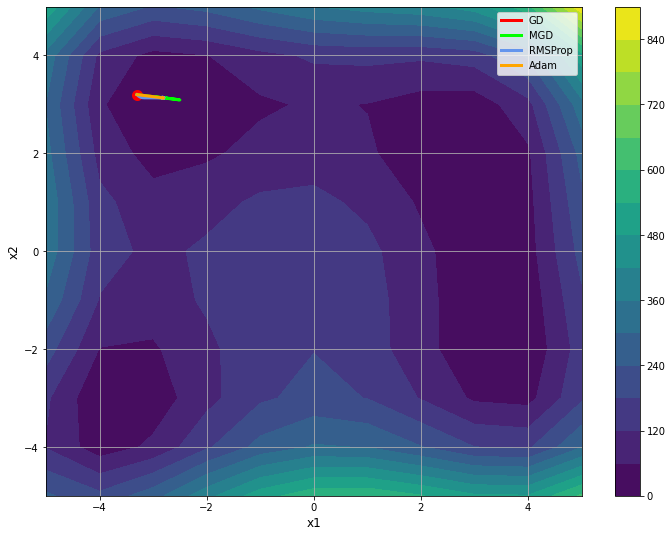

In [ ]:
# Применение методов отптимизации
gd_x1, gd_x2 = SGD(x1, x2)
mgd_x1, mgd_x2 = impulse_SGD(x1, x2, beta)
rms_x1, rms_x2 = RMSProp(x1, x2, beta)
ad_x1, ad_x2 = Adam(x1, x2, beta1, beta2)
 
result_x1 = [gd_x1, mgd_x1, rms_x1, ad_x1]
result_x2 = [gd_x2, mgd_x2, rms_x2, ad_x2]
 
visualization(coord_x1, coord_x2, target_func_rez, result_x1, result_x2)

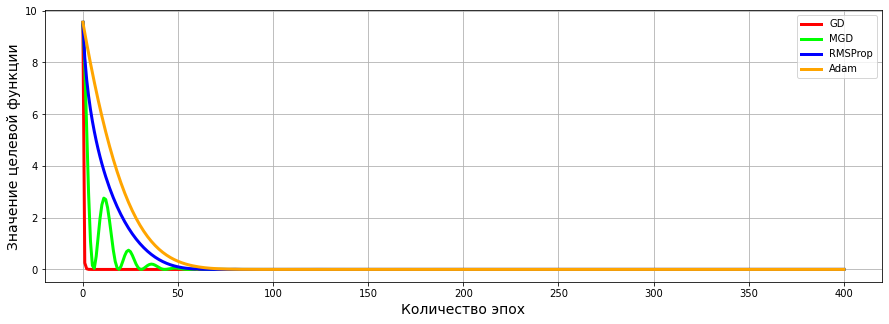

In [ ]:
x = np.arange(era_count + 1)
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(5)
 

ax.set_xlabel("Количество эпох", fontsize=14)
ax.set_ylabel("Значение целевой функции", fontsize=14)
 
ax.plot(x, use_func(gd_x1, gd_x2), color='red', label="GD", linewidth='3')
ax.plot(x, use_func(mgd_x1, mgd_x2), color='lime', label="MGD", linewidth='3')
ax.plot(x, use_func(rms_x1, rms_x2), color='blue', label="RMSProp", linewidth='3')
ax.plot(x, use_func(ad_x1, ad_x2), color='orange', label="Adam", linewidth='3')
ax.legend()
ax.grid()